# Semester Project - Machine Learning
Project made by Nicolas Gregori SUPSI - 2021

## Dataset description
The current dataset contains params about weather in Szeged, a city located in Hungary, between 2006 and 2016. It contains the following columns: 
- **Formatted Date**
- **Summary**  (weather forecast by hour)
- **Precip Type**
- **Temperature** (in Celsius Degrees)
- **Apparent Temperature** (in Celsius Degrees) - It is the apparent temperature perceived by humans
- **Humidity**
- **Wind Speed** (in km/h)
- **Wind Bearing** (degrees)
- **Visibility** (km)
- **Loud Cover**
- **Pressure** (in millibars)
- **Daily Summer** (weather forecast by day)

Also, there are some columns which summarize how was the weather at a precise hour.

Available at: [*Weather in Szeged*](https://www.kaggle.com/budincsevity/szeged-weather/discussion).

## Preliminar operations

In [135]:
#Making sure not losing the job done
%autosave 25

Autosaving every 25 seconds


Load the cell below to import all dependencies needed to run the notebook

In [139]:
#Various imports
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
#Defining portion for test pahse
testPortion = 0.3

First step: we have to import the dataset into the notebook and save it into a Dataframe

In [141]:
#Load the dataset from memory 
dfPath = "./resources/weatherHistory.csv"
resPath = "./results/"
df = pd.read_csv(dfPath)

In [142]:
#Print dataset's head      
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [143]:
#Printing features' information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [144]:
#Getting rows and columns' number
dfNumber = df.shape

In [145]:
#Printing some feature's information
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## Prepocessing phase

Before starting doing some analyses, it is important to prepare the dataset during the preprocessing phase. For example, we can delete irrlevant columns (more details below) and transform discrete features into a more adaptable format:

There are some columns which are particulary useless. For instance, **Loud Cover** data are full of 0's and that makes this column so irrelevant. The same principle is valid for the string(**Daily Summary** and **Summary**) that tells how it's the weather every hour. \

In [146]:
df = df.drop(['Daily Summary', 'Summary', 'Loud Cover'], axis = 1)
df = df.rename(columns = {"Temperature (C)":"Temperature",
                          "Wind Speed (km/h)":"Wind Speed",
                           "Apparent Temperature (C)":"Apparent Temperature",
                            "Visibility (km)":"Visibility",
                            "Wind Bearing (degrees)":"Wind Bearing",
                           "Pressure (millibars)":"Pressure"})
df

,Formatted Date,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


Now, we are going to take a quick look about data distribution and how features are correlated with each other. Seeing the table below we can start thinking what kinds of analyses could be interesting

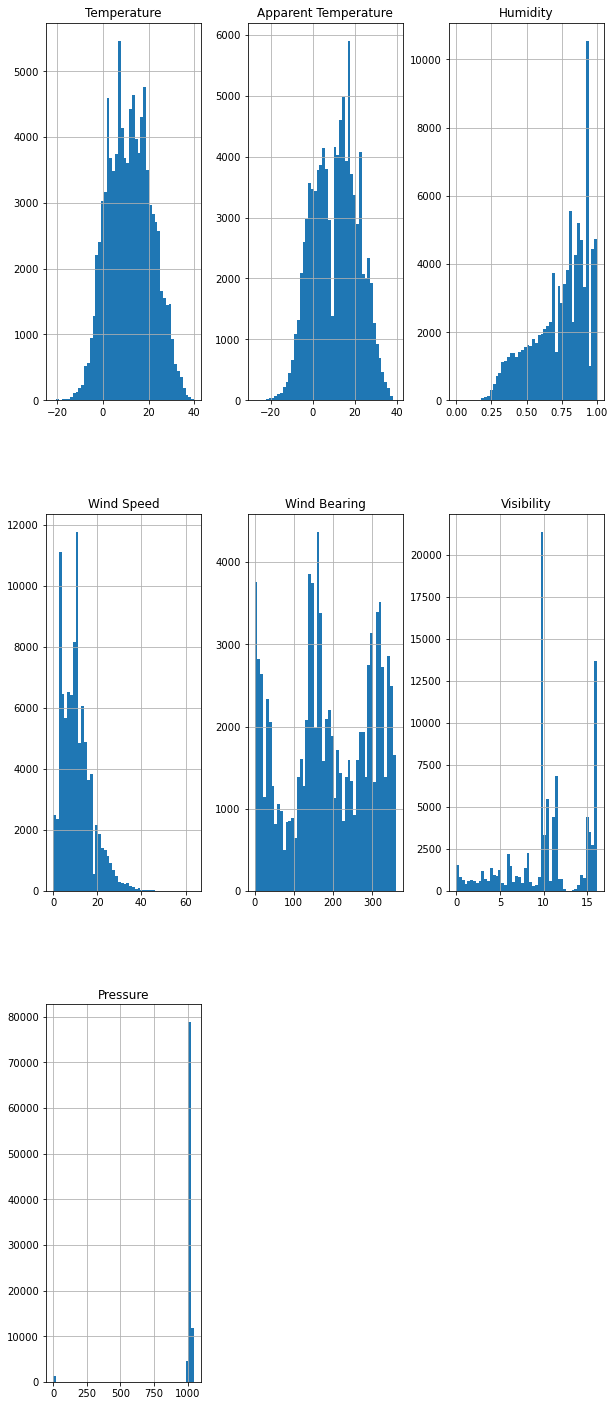

In [147]:
#Print data distribution
df.hist(bins = 50, figsize = (10,25))
plt.show()

In [148]:
df.corr()

,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure
Temperature,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [149]:
df= df.replace(np.nan, 'other', regex=True) # All data frame

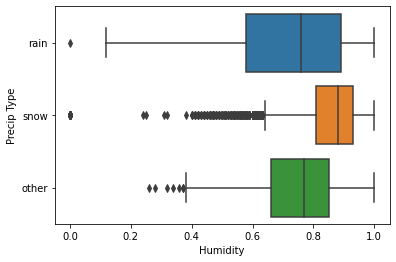

In [150]:
fig = sns.boxplot(x=df["Humidity"],y=df["Precip Type"])
plt.show()

In [151]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z') 
df['Year'] = df['Formatted Date'].apply(lambda x: x.year)
df['Month'] = df['Formatted Date'].apply(lambda x: x.month)
df['Day'] = df['Formatted Date'].apply(lambda x: x.day)
df['Hour'] = df['Formatted Date'].apply(lambda x: x.hour)

In [152]:
df

,Formatted Date,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure,Year,Month,Day,Hour
0,2006-04-01 00:00:00+02:00,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1,0
1,2006-04-01 01:00:00+02:00,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1,1
2,2006-04-01 02:00:00+02:00,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,2
3,2006-04-01 03:00:00+02:00,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,3
4,2006-04-01 04:00:00+02:00,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,19
96449,2016-09-09 20:00:00+02:00,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,20
96450,2016-09-09 21:00:00+02:00,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,21
96451,2016-09-09 22:00:00+02:00,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,22


In [153]:
#Splitting the dataset into train, validation and test dataset
[dfTrain,dfTest] = train_test_split(df.drop(['Formatted Date','Year','Month','Day'],axis=1),random_state=1234,test_size=testPortion) 

## Predicting Temperature  basing on Humidity

In [154]:
xTrain = dfTrain["Humidity"].values
xTest  = dfTest["Humidity"].values
yTrain = dfTrain["Temperature"].values
yTest  = dfTest["Temperature"].values

xTrain = np.reshape(xTrain,(-1,1))
xTest = np.reshape(xTest,(-1,1))

In [155]:
linReg = LinearRegression()
linReg.fit(xTrain,yTrain)

LinearRegression()

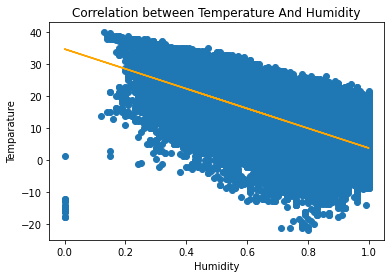

In [156]:
yTestPredicted = linReg.predict(xTest)
plt.scatter(xTrain,yTrain)
plt.xlabel("Humidity")
plt.ylabel("Temparature")
plt.title("Correlation between Temperature And Humidity")
plt.plot(xTest,yTestPredicted,color="orange")
plt.show()

In [157]:
linReg.score(xTest,yTest)

0.40055937371841754

## Predicting Apparent Temperature every hour
The apparent temperature is the temperature perceived by humans, caused by the combined effect of air temperature, relative temperature and wind speed. Mostly, it is applied on outdoor perceived temperature. Is it that these features have a great correlation? \
Let's find out.

In [158]:
xData = df[["Temperature","Humidity","Wind Speed"]].values
yData = df["Apparent Temperature"].values

In [159]:
#Preparing datas for train, validation and test phase
xTrain = dfTrain[["Temperature","Humidity","Wind Speed"]].values
yTrain = dfTrain["Apparent Temperature"].values


xTest = dfTest[["Temperature","Humidity","Wind Speed"]].values
yTest = dfTest["Apparent Temperature"].values

In [160]:
linReg = LinearRegression()
linReg.fit(xTrain,yTrain)
print(f"Intercepts:  {linReg.intercept_}")
print(f"Coefficients:  {linReg.coef_}")

Intercepts:  -2.3199860618221315
Coefficients:  [ 1.12609517  1.04336432 -0.09508639]


In [161]:
#Checking how regressior behaviours with  set
yTrainPredicted = linReg.predict(xTrain)
RMSETrain = np.sqrt(mean_squared_error(yTrain,yTrainPredicted))
print(f"RMSE train set: {RMSETrain}")

RMSE train set: 1.0775519953926025


In [162]:
yTestPredicted = linReg.predict(xTest)

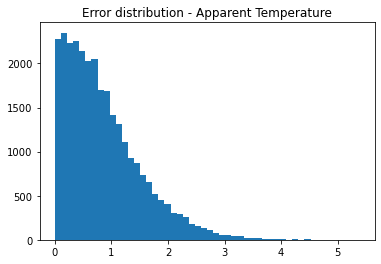

In [163]:
#Show errors distribution
errors = np.abs(yTestPredicted - yTest)
plt.figure()
plt.title("Error distribution - Apparent Temperature")
plt.hist(x = errors, bins = 50)
plt.show()

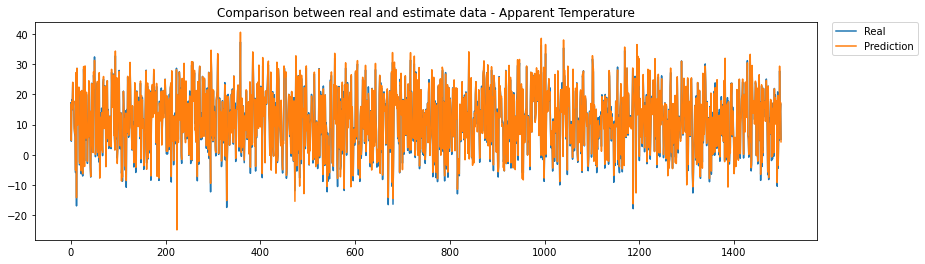

In [164]:
#Show trend between real and predicted (based on a sample of 1500 units)
plt.figure(figsize=(14, 4))
plt.title("Comparison between real and estimate data - Apparent Temperature")
plt.plot(yTest[0:1500], label='Real')
plt.plot(yTestPredicted[0:1500], label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [165]:
#Try to predict "real" data
RMSETest = np.sqrt(mean_squared_error(yTest,yTestPredicted))
R2Test = linReg.score(xTest,yTest)
print(f"RMSE score test: {RMSETest}")
print(f"R2 score test: {R2Test}")

RMSE score test: 1.084538386556651
R2 score test: 0.9896964090343895


In conclusion, it's a evidence that they have a great correlation. The regression is abled to explain the 98% of all instances. So, there is no reason to try improving its quality through other algorithms. We can also save result in a txt file executing the cell below.

In [166]:
#Save prediction's data
np.savetxt(resPath + "Apparent Temperature - Predictions",yTestPredicted)

## Predicting Atmospheric Pressure - Ridge and Lasso Regression
Let's try predicting Pressure using all relevant columns 

In [167]:
targetColumn = ["Pressure"]
predictors = list(set(list(df.columns)) - set(targetColumn))
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10]
params = {'alpha': alpha}

Xs = df[predictors].values
Ys = df[targetColumn].values

   ### Ridge Regression

In [168]:
ridge = Ridge()
ridgeReg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error', cv=5, verbose=1)
ridgeReg.fit(xTrain,yTrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [169]:
ridgeReg.best_params_

{'alpha': 1}

In [170]:
ridgeReg.best_score_

-1.1613535117156528

In [171]:
yTestRidgePredicted = ridgeReg.predict(xTest)

In [172]:
ridgeError = np.sqrt(mean_squared_error(yTest,yTestRidgePredicted))
print(f"RMSE score: {ridgeError}")

RMSE score: 1.0845389582590619


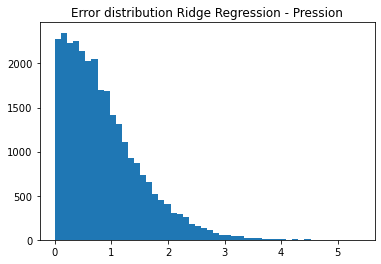

In [173]:
residuals = np.abs(yTest - yTestRidgePredicted)
plt.figure()
plt.title("Error distribution Ridge Regression - Pression")
plt.hist(x = residuals, bins = 50)
plt.show()

### Lasso Regression

In [174]:
lasso = Lasso()
lassoReg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error', cv=5, verbose=1)
lassoReg.fit(xTrain,yTrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [175]:
lassoReg.best_params_

{'alpha': 1}

In [176]:
lassoReg.best_score_

-1.1613535117156528

In [177]:
yTestLassoPredicted = lassoReg.predict(xTest)

In [178]:
lassoError = np.sqrt(mean_squared_error(yTest,yTestLassoPredicted))
print(f"RMSE score: {lassoError}")

RMSE score: 1.0845389582590619


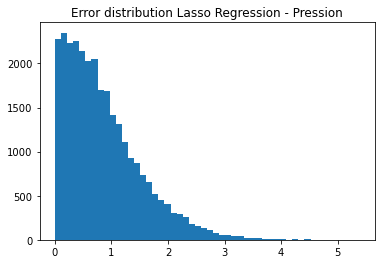

In [179]:
residuals = np.abs(yTest - yTestLassoPredicted)
plt.figure()
plt.title("Error distribution Lasso Regression - Pression")
plt.hist(x = residuals, bins = 50)
plt.show()

We can observe that Ridge and Lasso via Cross Validation obtain the same results.

## Predicting weather type basing on Humidity

In [180]:
xTrain = df["Humidity"].values
yTrain = df["Precip Type"].values
xTest = dfTest["Humidity"].values
yTest = dfTest["Precip Type"].values

In [181]:
scaler = StandardScaler()

xTrain = np.reshape(xTrain,(-1,1))
xTest = np.reshape(xTest,(-1,1))

scaler.fit(xTrain)
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [182]:
weatherClassifier =  KNeighborsClassifier()
weatherClassifier.fit(xTrainScaled,yTrain)

KNeighborsClassifier()

In [183]:
yWeatherPredicted = weatherClassifier.predict(xTest)

In [187]:
print("Confusion matrix: ")
print(confusion_matrix(yTest,yWeatherPredicted))
print("Classification report: ")
print(classification_report(yTest,yWeatherPredicted))
print(f"Accuracy: {weatherClassifier.score(xTestScaled,yTest)}")

Confusion matrix: 
[[    0   131    13]
 [    0 24193  1375]
 [    0  3096   128]]
Classification report: 


C:\Users\Notebook\anaconda3\envs\Data Science\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       other       0.00      0.00      0.00       144
        rain       0.88      0.95      0.91     25568
        snow       0.08      0.04      0.05      3224

    accuracy                           0.84     28936
   macro avg       0.32      0.33      0.32     28936
weighted avg       0.79      0.84      0.81     28936

Accuracy: 0.8837779928117224


Let's try predicting  the best" case

In [185]:
errorsClassifiers = list()
for i in range (1,40):
    weatherClassifier =  KNeighborsClassifier(n_neighbors=i)
    weatherClassifier.fit(xTrainScaled,yTrain)
    yPredict = weatherClassifier.predict(xTest)
    errorsClassifiers.append(np.mean(yTest != yPredict))

Text(0, 0.5, 'K mean error')

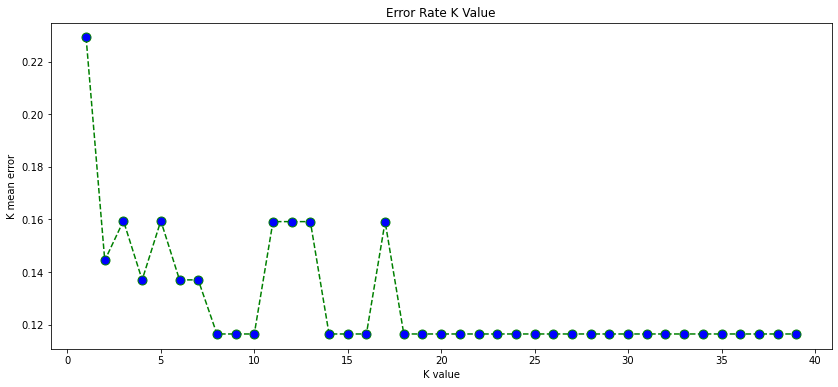

In [186]:
plt.figure(figsize =(14,6))
plt.plot(range(1,40), errorsClassifiers, color = "green", linestyle="dashed", marker="o", 
         markerfacecolor='blue', markersize=9)
plt.title("Error Rate K Value")
plt.xlabel("K value")
plt.ylabel("K mean error")

Observing the chart we can figure out that the best *K* is 7, but anyway it is not a goob classifier, because tends to predicts always the **rain** casem although a high accuracy.